In [ ]:
"""
Các ký hiệu viết tắt:
- dt: data
- bdt: big data
- lbs: labels
- dt_mt: data_matrix
"""

In [7]:
!pip install opendatasets
import opendatasets as od
od.download("https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: hoangducanh1865
Your Kaggle Key: ········


100%|██████████████████████████████████████| 66.0M/66.0M [00:06<00:00, 10.2MB/s]


In [47]:
# import libs
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import roc_auc_score

In [48]:
# read dataset
dt = pd.read_csv('creditcardfraud/creditcard.csv')

print("There are " + str(len(dt)) + " rows/observations in the credit card fraud dataset.")
print("There are " + str(len(dt.columns)) + " variables in the dataset")

dt.head()

There are 284807 rows/observations in the credit card fraud dataset.
There are 31 variables in the dataset


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [49]:
n = 10 # số lần sẽ lặp lại của dataset
bdt = pd.DataFrame(np.repeat(dt.values, n, axis=0), columns=dt.columns)

print("There are " + str(len(bdt)) + " rows/observations in the credit card fraud dataset.")
print("There are " + str(len(bdt.columns)) + " variables in the dataset")

bdt.head(15)

There are 2848070 rows/observations in the credit card fraud dataset.
There are 31 variables in the dataset


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
2,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
3,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
4,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
5,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
6,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
7,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
8,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
9,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0


[2843150    4920]


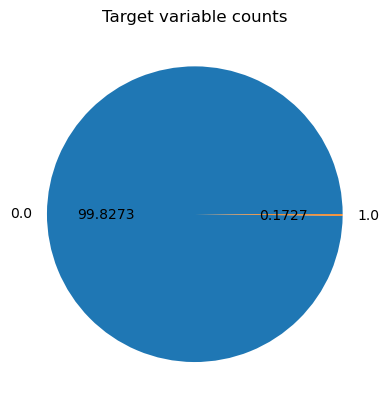

In [50]:
# get the set of distinct classes
lbs = bdt.Class.unique() # Lưu ý "Class" ở đây là <tên> của target value cần dự đoán giá trị

# get the count of each class
sizes = bdt.Class.value_counts().values
print(sizes)

# plot the class value counts
fig, ax = plt.subplots()
ax.pie(sizes, labels=lbs, autopct='%.4f')
ax.set_title('Target variable counts')
plt.show()


In [51]:
# PREPROCESSING
# standardize features by removing the mean and scaling to unit variance
bdt.iloc[:,1:30] = StandardScaler().fit_transform(bdt.iloc[:,1:30])
dt_mt = bdt.values

# x: feature matrix (for this analysis, we exclude the Time variable from the dataset)
x = dt_mt[:,1:30] #  Lấy từ cột 1 đến cột thứ 29 (ko lấy cột 0)

# y: labels vector
y = dt_mt[:,30] # Lấy duy nhất cột 30

# data normalization
x = normalize(x, norm="l1")

# print the shape of the features matrix and the labels vector
print("x.shape = ", x.shape, "\ny.shape = ", y.shape)

x.shape =  (2848070, 29) 
y.shape =  (2848070,)


In [52]:
# TRAIN/TEST SPLIT
x_tr, x_te, y_tr, y_te = train_test_split(x, y, test_size=0.3, random_state=35)
print("x_tr.shape = ", x_tr.shape, "y_tr.shape = ", y_tr.shape)
print("x_te.shape = ", x_te.shape, "y_te.shape = ", y_te.shape)

x_tr.shape =  (1993649, 29) y_tr.shape =  (1993649,)
x_te.shape =  (854421, 29) y_te.shape =  (854421,)


In [53]:
# BUILD MODEL WITH SCIKIT-LEARN
from sklearn.tree import DecisionTreeClassifier

skl_mmd = DecisionTreeClassifier(max_depth=4, random_state=35)

# FIT MODEL
t0 = time.time()
skl_mmd.fit(x_tr, y_tr)
skl_time = time.time()-t0
print("Scikit-Learn training time (s): %.5f" % skl_time)

Scikit-Learn training time (s): 26.73518


In [54]:
# Make prediction
skl_prd = skl_mmd.predict_proba(x_te)[:,1]
skl_roc_auc = roc_auc_score(y_te, skl_prd)
print("skl roc-auc score: %.2f" % skl_roc_auc)

skl roc-auc score: 0.75
